# Analyzing & Visualizing Data

In this notebook, we'll be analyzing and visualizing our master dataset that was generated by **read_data.ipynb**.

Import Libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Load Dataset Into Notebook

In [2]:
dataset = pd.read_csv("input/master_dataset.csv") 
dataset.head()

,Unnamed: 0,title,text,subject,date,Category,news_story
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


**Determine counts of Fake(0) & Real(1) News in dataset**

In [4]:
dataset['Category'].value_counts()


0    23481
1    21417
Name: Category, dtype: int64

**Project Counts as Bar Plots**

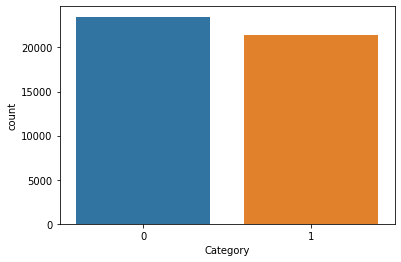

In [5]:
sns.countplot(dataset['Category'])


**Observations:** We observe an almost-equal amount of fake and real news stories in our dataset.



**Determine counts of new stories based on category label and subject**

In [8]:
dataset[['Category','subject','news_story']].groupby(['Category','subject']).count()


news_story
Category subject                    
0        Government News        1570
         Middle-east             778
         News                   9050
         US_News                 783
         left-news              4459
         politics               6841
1        politicsNews          11272
         worldnews             10145

**Project Counts as Bar Plots.**

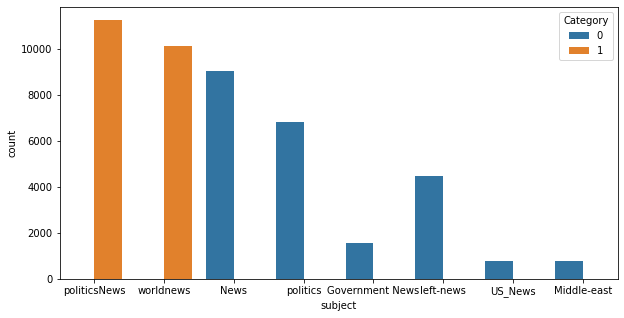

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue= "Category", data=dataset)

**Observations:**

1. The subjects **politicNews** and **worldnews** are the most frequent in the dataset
2. All real news stories observed are found within the subjects **politicNews** and **worldnews**
3. Most fake news stories are found within the subject **News**


**Word Cloud for Real News Stories**

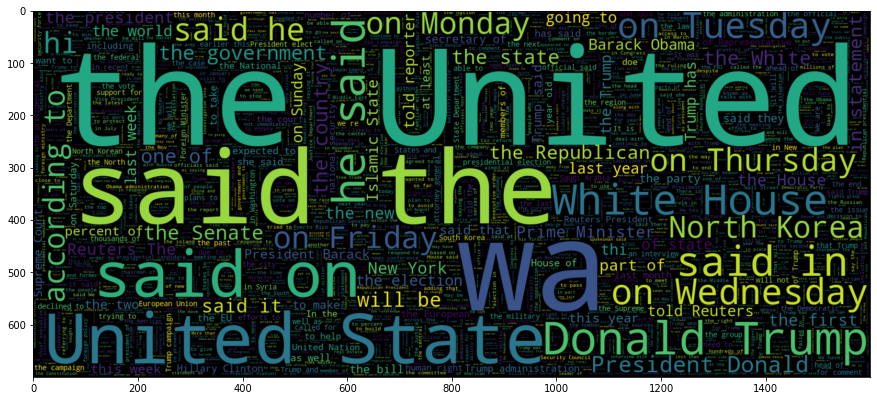

In [16]:
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==1].news_story))
plt.imshow(word_cloud, interpolation="bilinear")



**Observations:** We can observe from the word cloud that the words **the**, **United**, **said** and **the** are frequently used in real news stories.


**Word Cloud for Fake New Stories**


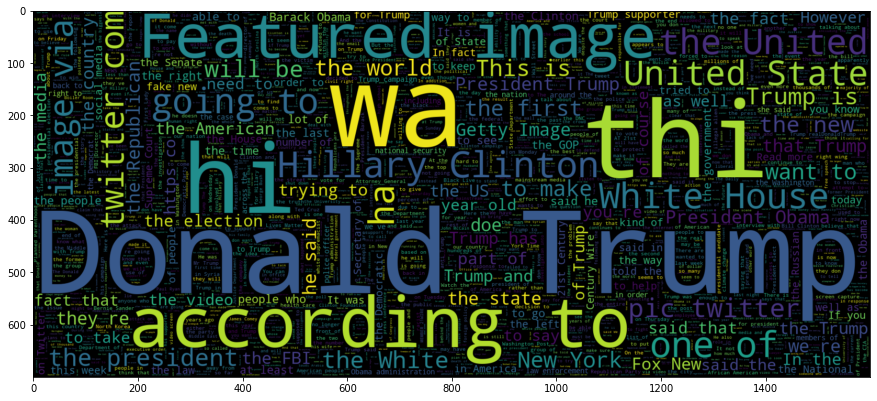

In [18]:
plt.figure(figsize=(15,15))
word_cloud = WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==0].news_story))
plt.imshow(word_cloud, interpolation="bilinear")


**Observations:** We can observe from the word cloud that the words **Donald** **Trump** are used in fake news stories.
